# (201905-baywheels-tripdata Dataset Exploration )
## by (Mohamed Gamal)

## Preliminary Wrangling

> it's a dataset of trips by wheels in may 2019 

In [73]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [74]:
df=pd.read_csv('201905-baywheels-tripdata.csv')
print(df.shape)
df.head(10)

(182163, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No
5,2954,2019-05-31 23:26:52.8120,2019-06-01 00:16:07.7250,50.0,2nd St at Townsend St,37.780526,-122.390288,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,3264,Customer,No
6,3071,2019-05-31 23:24:40.2500,2019-06-01 00:15:51.3030,50.0,2nd St at Townsend St,37.780526,-122.390288,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1566,Customer,No
7,924,2019-05-31 23:58:16.1120,2019-06-01 00:13:40.5880,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,50.0,2nd St at Townsend St,37.780526,-122.390288,1649,Subscriber,No
8,696,2019-05-31 23:57:58.1300,2019-06-01 00:09:35.0770,22.0,Howard St at Beale St,37.789756,-122.394643,81.0,Berry St at 4th St,37.775880,-122.393170,2832,Subscriber,No
9,510,2019-05-31 23:54:52.5790,2019-06-01 00:03:23.3450,211.0,Broadway at 40th St,37.827757,-122.256716,181.0,Grand Ave at Webster St,37.811377,-122.265192,81,Subscriber,Yes


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             182163 non-null  int64         
 1   start_time               182163 non-null  datetime64[ns]
 2   end_time                 182163 non-null  datetime64[ns]
 3   start_station_id         182148 non-null  float64       
 4   start_station_name       182148 non-null  object        
 5   start_station_latitude   182163 non-null  float64       
 6   start_station_longitude  182163 non-null  float64       
 7   end_station_id           182148 non-null  float64       
 8   end_station_name         182148 non-null  object        
 9   end_station_latitude     182163 non-null  float64       
 10  end_station_longitude    182163 non-null  float64       
 11  bike_id                  182163 non-null  int64         
 12  user_type       

In [285]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'hour', 'session', 'dayofweek', 'month',
       'duration_minutes', 'duration_hours', 'duration_days'],
      dtype='object')

In [77]:
#let's convert  datetime cols from object datat type to datetime type
df['start_time']=df['start_time'].astype('datetime64[ns]') 
df['end_time']=df['end_time'].astype('datetime64[ns]') 


In [165]:
#let's get the hours of the trip start and get the time of the day 
df['hour']=df['start_time'].dt.hour
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','AfterNoon','Evening','Night']
df['session'] = pd.cut(df['hour'], bins=b, labels=l, include_lowest=True)
df['session'].value_counts()


Evening          56385
Morning          38978
AfterNoon        37854
Early Morning    36966
Night             9472
Late Night        2508
Name: session, dtype: int64

In [80]:
df['dayofweek']=df['start_time'].dt.weekday
daydic={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'}
df['dayofweek']=df['dayofweek'].apply(lambda x:daydic[x] )
df['dayofweek'].value_counts()

Thrusday     34757
Wednesday    34563
Friday       34202
Tuesday      27720
Monday       24587
Saturday     13243
Sunday       13091
Name: dayofweek, dtype: int64

In [81]:
df['month']=df['start_time'].dt.month
df['month'].value_counts()

5    182163
Name: month, dtype: int64

In [101]:
df['duration_minutes']=df['duration_sec'].apply(lambda x: x/60)
df['duration_hours']=df['duration_minutes'].apply(lambda x: x/60)
df['duration_days']=df['duration_hours'].apply(lambda x: x/24)
df[['duration_sec','duration_minutes','duration_hours','duration_days']].head()

,duration_sec,duration_minutes,duration_hours,duration_days
0,48877,814.616667,13.576944,0.565706
1,47050,784.166667,13.069444,0.544560
2,5912,98.533333,1.642222,0.068426
3,2629,43.816667,0.730278,0.030428
4,4235,70.583333,1.176389,0.049016


In [201]:
df['duration_minutes'].describe()

count    182163.000000
mean         13.204362
std          30.403167
min           1.016667
25%           5.950000
50%           9.466667
75%          14.700000
max        1416.116667
Name: duration_minutes, dtype: float64

In [159]:
df['duration_sec'].describe()

count    182163.000000
mean        792.261744
std        1824.190023
min          61.000000
25%         357.000000
50%         568.000000
75%         882.000000
max       84967.000000
Name: duration_sec, dtype: float64

### What is the structure of your dataset?

> 182163 Rows , 14 Columns

### What is/are the main feature(s) of interest in your dataset?

> duration_sec , start_time , user_type  , bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_hours , start_time ,  session , dayofweek ,user_type , bike_share_for_all_trip

## Univariate Exploration


### 1- duration_minutes column distribution
> let's see the distribution of the duration of the trip by minutes

In [214]:
df['duration_minutes'].describe()

count    182163.000000
mean         13.204362
std          30.403167
min           1.016667
25%           5.950000
50%           9.466667
75%          14.700000
max        1416.116667
Name: duration_minutes, dtype: float64

Text(0, 0.5, 'frequencies')

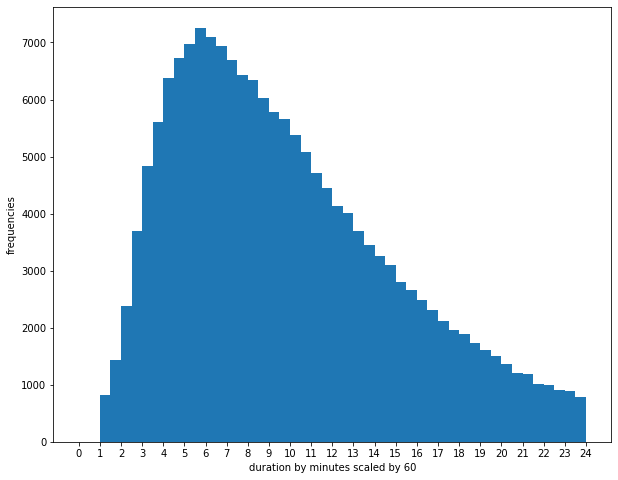

In [211]:
bins=np.arange(0,(df['duration_minutes'].max()/60)+0.5,0.5)
ticks=np.arange(0,25,1)
plt.figure(figsize=(10,8));
plt.hist(df['duration_minutes'],bins=bins);
plt.xticks(ticks,ticks);
plt.xlabel('duration by minutes scaled by 60')
plt.ylabel('frequencies')

Text(0, 0.5, 'frequencies')

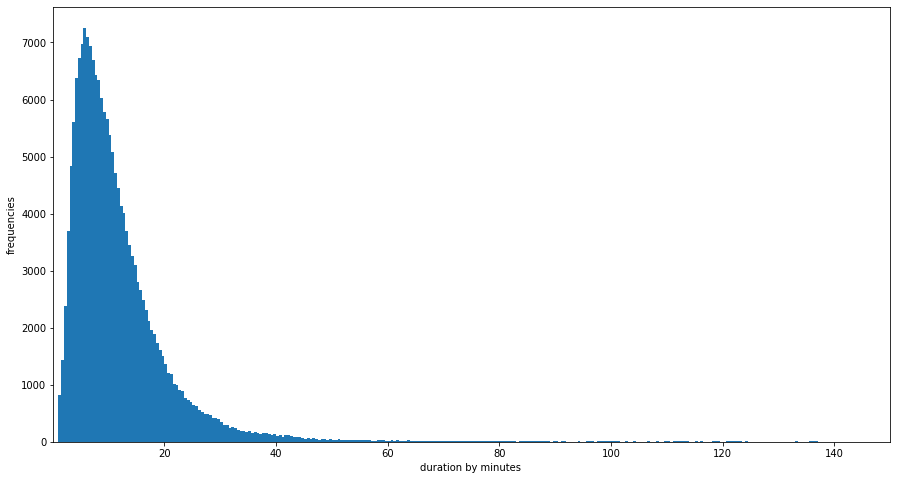

In [216]:
bins=np.arange(0,(df['duration_minutes'].max())+0.5,0.5)
plt.figure(figsize=(15,8));
plt.hist(df['duration_minutes'],bins=bins);
plt.xlim(0.1,150)
plt.xlabel('duration by minutes ')
plt.ylabel('frequencies')

#### Findings
> from the chart .. we can say that the duration is left skewed 
so we can say people prefer the small trip not the long one.
> from the describtion of the col ..we can say that the average of trip duration take 12 or 13 minutes .

### 2- session col distribution
> let's see the distribution of the sessions the people take the trip in 

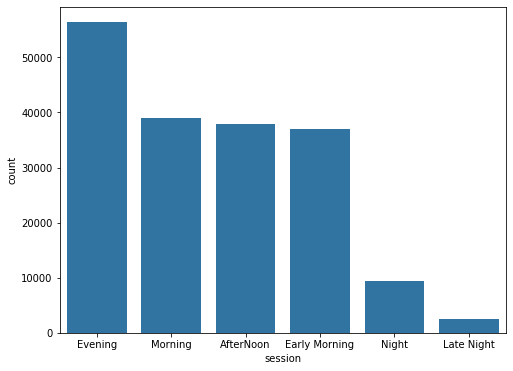

In [166]:
plt.figure(figsize=(8,6))
sb.countplot(data=df,x='session',color=sb.color_palette()[0],
             order=['Evening','Morning','AfterNoon','Early Morning','Night','Late Night'])

#### Findings
> from the chart we can say that people prefer to take the trips on Evening Session,
 then the second prefered Session is the Morning , then the third one is the Afternoon Session,then Early Morning Session
 ,then Night Session ,and the least prefered session to take trip in is Late Night Session.

### 3- dayofweek distribution
> let's see the distribution of days of week that the people take the trip on 

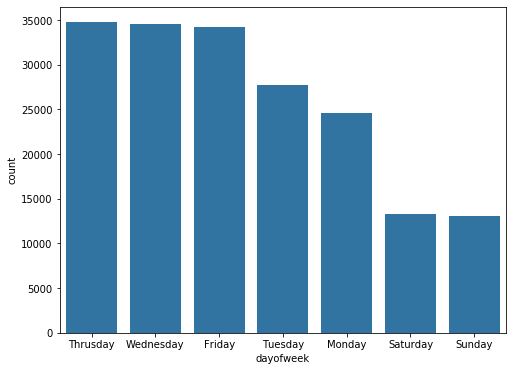

In [167]:
plt.figure(figsize=(8,6))
sb.countplot(data=df,x='dayofweek',color=sb.color_palette()[0],
             order=['Thrusday','Wednesday','Friday','Tuesday','Monday','Saturday','Sunday'])

#### Findings
> from the chart we can say that people most prefered day to take trip on is Thrusday ,and the least prefered day to take trip on is Sunday

### 4- user_type distribution
> let's look at the distribution of the type of the users

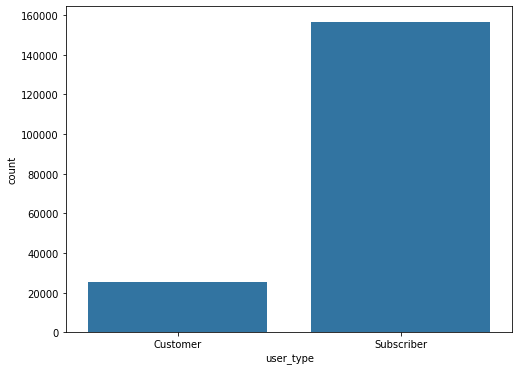

In [284]:
plt.figure(figsize=(8,6))
sb.countplot(data=df,x='user_type',color=sb.color_palette()[0])

#### Findings
> from the chart we can say that the most of the users are subscribers not customers

### 5- bike_share_for_all_trip distribution
> let's see how many people share the bike for all of their trips

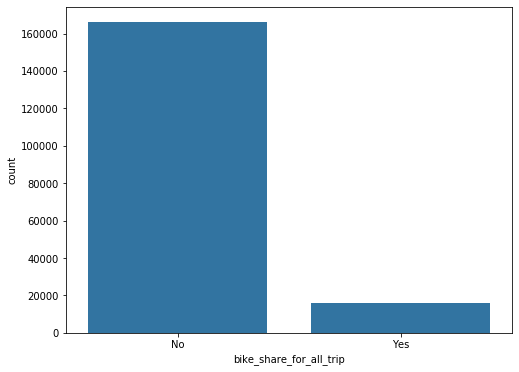

In [170]:
plt.figure(figsize=(8,6))
sb.countplot(data=df,x='bike_share_for_all_trip',color=sb.color_palette()[0])

#### Findings
> from the chart we can say that most people don't prefer to share bike for all trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> from the distributions we found some interesting details about the data:
 1- we can say that the duration distribution is left skewed so we can say people prefer the small trip not the long one.
 2-people most preferd session to take the trips on is Evening Session,and the least prefered session is Late Night Session.
 3-people most prefered day to take trip on is Thrusday ,and the least prefered day to take trip on is Sunday.
 4-the most of the users are subscribers not customers.
 5-most people don't prefer to share bike for all trips.
>there's not unusual points .
>i nedded to scale the values from the duration_minutes col.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>there was an unusual distribution ..the distribution of the duration by seconds .
>i nedded to scale the values from the duration_minutes col to make the values in ranges that could be distributed and visualized clearly.

## Bivariate Exploration


### 1- session Vs. duration_minutes
> let's see the relation between the session the people take the trip in and the duation they spendon the trip by minutes.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

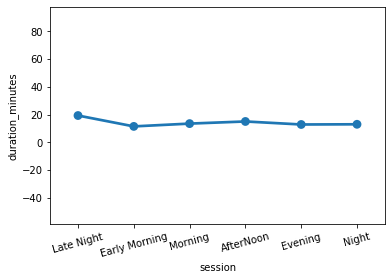

In [180]:
sb.pointplot(data=df,x='session',y='duration_minutes',errwidth=0,ci='sd')
plt.xticks(rotation=15)

#### Findings
> from the chart we can say that people spend in average more time in trips if it is in the Late Night session.

### 2- daysofweek Vs. duration_minutes
> let's see the relation between the days of the week  the people take the trip on and the duation they spendon the trip by minutes.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

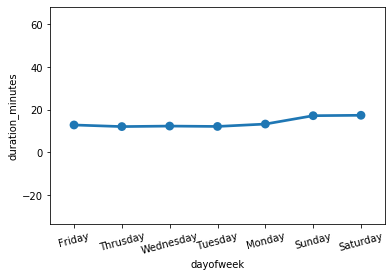

In [181]:
sb.pointplot(data=df,x='dayofweek',y='duration_minutes',errwidth=0,ci='sd')
plt.xticks(rotation=15)

#### Findings
> from the chart we can say that .. in average people spend more time in trips if they take the trip on Saturdayor Sunday.

### 3- user_type Vs. duration_minutes
> let's see the relation between the type of the users and the duation they spendon the trip by minutes.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

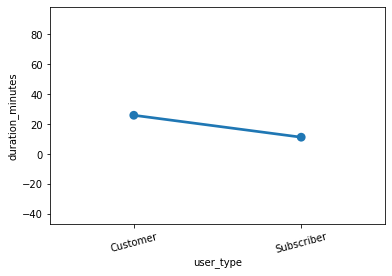

In [182]:
sb.pointplot(data=df,x='user_type',y='duration_minutes',errwidth=0,ci='sd')
plt.xticks(rotation=15)

#### Findings
> from the chart we can say that ...Customer on average spend more time in the trips than Subscriber.

### 4- daysofweek Vs. user_type
> let's see the relation between the days of the week the people take the trip in andthe type of the users.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

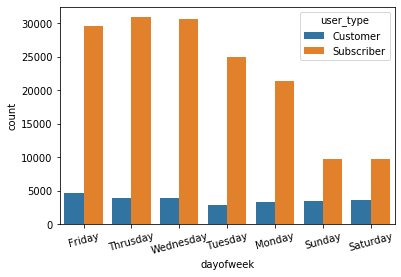

In [186]:
sb.countplot(data=df,x='dayofweek',hue='user_type')
plt.xticks(rotation=15)

#### Findings
> 1-Customer people take trips on Friday more than any day..and the least day they take trips on is Tuesday.

> 2- Subscriber people take trips on Thrusday more than any day..and the least day they take trips on is Sunday.

### 5- session Vs. user_type
> let's see the relation between the session of the day the people take the trip in andthe type of the users.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

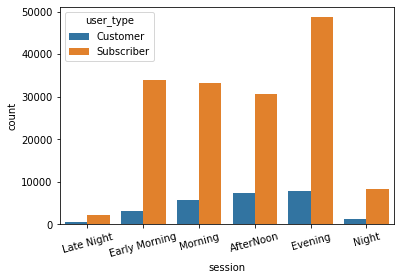

In [187]:
sb.countplot(data=df,x='session',hue='user_type')
plt.xticks(rotation=15)

#### Findings
> 1-Customer people take trips on Evening more than any Session..and the least session they take trips on is Late Night.

> 2- Subscriber people take trips on Evening more than any session..and the least session they take trips on is Late Night.

### 6- session Vs. daysofweek
> let's see the relation between the session of the day the people take the trip in and the days of the week the users take the trip in.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

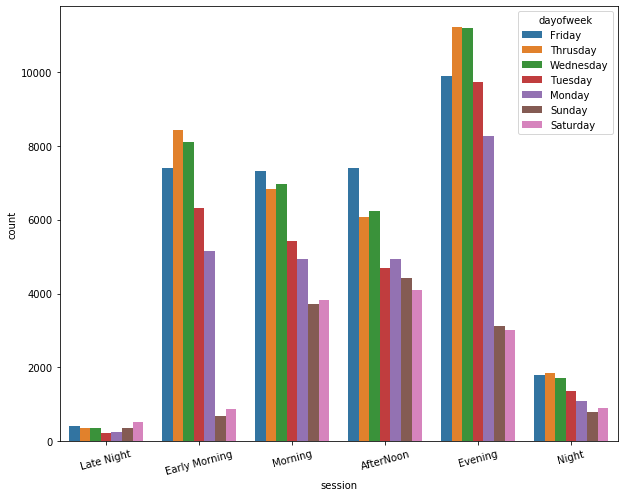

In [220]:
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='session',hue='dayofweek')
plt.xticks(rotation=15)

#### Findings
>1- on Friday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.

>2- on Thrusday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.

>3- on Wednesday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.

>4- on Tuesday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.

>5- on Monday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.

>6- on Sunday the most session of the day the people prefer to take trips in is AfterNoon , and the least one is Late Night.

>7- on Saturday the most session of the day the people prefer to take trips in is AfterNoon , and the least one is Late Night.

### 7- duration Vs. user_type
>we need to divide the dataset based on the type of the users to get the duration_minutes column distribution in each one.

In [222]:
#let's divide the dataset
df_sub=df.loc[df['user_type']=='Subscriber']
df_cus=df.loc[df['user_type']=='Customer']
df_cus['duration_hours'].describe()


count    25494.000000
mean         0.430676
std          1.103344
min          0.016944
25%          0.156389
50%          0.248611
75%          0.398264
max         23.601944
Name: duration_hours, dtype: float64

Text(0, 0.5, 'frequencies')

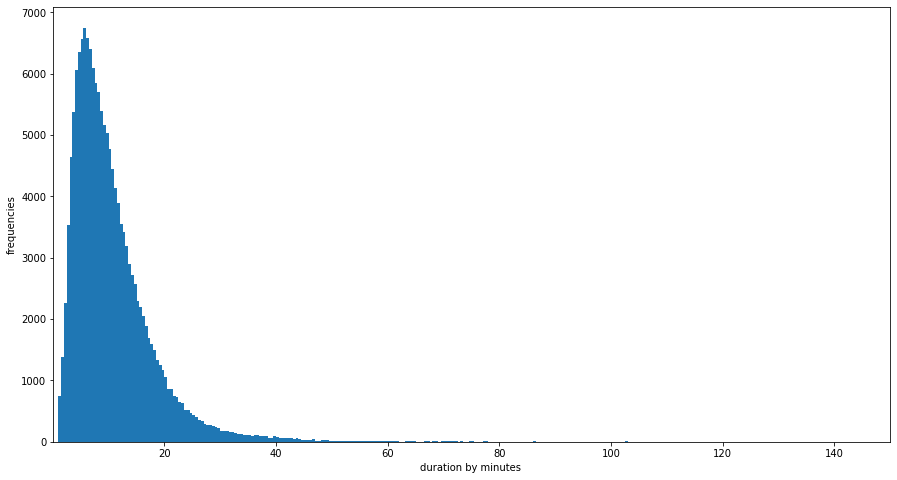

In [217]:
bins=np.arange(0,(df_sub['duration_minutes'].max())+0.5,0.5)
plt.figure(figsize=(15,8));
plt.hist(df_sub['duration_minutes'],bins=bins);
plt.xlim(0.1,150)
plt.xlabel('duration by minutes ')
plt.ylabel('frequencies')

Text(0, 0.5, 'frequencies')

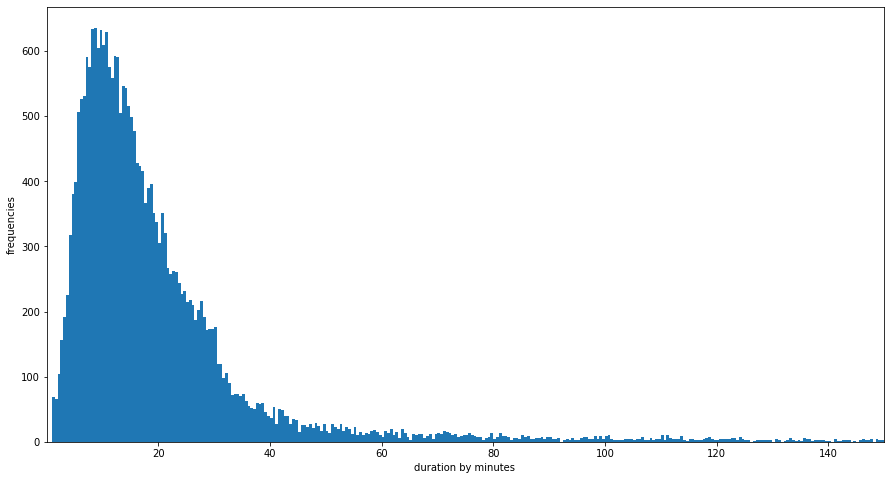

In [218]:
bins=np.arange(0,(df_cus['duration_minutes'].max())+0.5,0.5)
plt.figure(figsize=(15,8));
plt.hist(df_cus['duration_minutes'],bins=bins);
plt.xlim(0.1,150)
plt.xlabel('duration by minutes ')
plt.ylabel('frequencies')

#### Findings 
> we can say that the distribution of the duration_minutes in each one is close ..

> the standard diviation of the duration_minutes on the customer data is more than on the subscriber .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1- session Vs. duration_minutes : people spend in average more time in trips if it is in the Late Night session.

> 2- daysofweek Vs. duration_minutes: on average people spend more time in trips if they take the trip on Saturdayor Sunday.

> 3- user_type Vs. duration_minutes: Customer on average spend more time in the trips than Subscriber.

> 4- daysofweek Vs. user_type: 
>>- Customer people take trips on Friday more than any day..and the least day they take trips on is Tuesday.
>>- Subscriber people take trips on Thrusday more than any day..and the least day they take trips on is Sunday.

> 5- session Vs. user_type: 
>>- Customer people take trips on Evening more than any Session..and the least session they take trips on is Late Night.
>>- Subscriber people take trips on Evening more than any session..and the least session they take trips on is Late Night.

> 6- session Vs. daysofweek:
>>- on Friday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.
>>- on Thrusday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.
>>- on Wednesday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.
>>- on Tuesday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.
>>- on Monday the most session of the day the people prefer to take trips in is Evening , and the least one is Late Night.
>>- on Sunday the most session of the day the people prefer to take trips in is AfterNoon , and the least one is Late Night.
>>- on Saturday the most session of the day the people prefer to take trips in is AfterNoon , and the least one is Late Night.

> 7- duration Vs. user_type:
>>- we can say that the distribution of the duration_minutes in each one is close ..
>>- the standard diviation of the duration_minutes on the customer data is more than on the subscriber .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration


### 1- daysofweek Vs. duration_minutes Vs. user_type
> let's see the relation between the days of the week the people take the trips on and the duration of the trips on minutes and the effect of the user types on this relationship.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

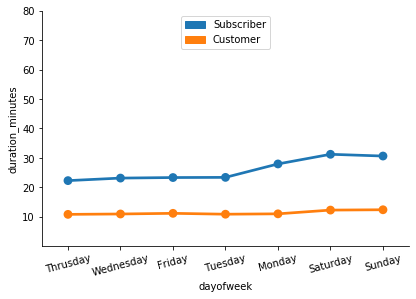

In [280]:
import matplotlib
g=sb.FacetGrid(data=df,hue='user_type',hue_order=['Customer','Subscriber'],height=4,aspect=1.5)
g=g.map(sb.pointplot,'dayofweek','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Thrusday','Wednesday','Friday','Tuesday','Monday','Saturday','Sunday'])
name_to_color = {
    'Subscriber':   sb.color_palette()[0],
    'Customer': sb.color_palette()[1],
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches)

plt.ylim(0.1,80)
plt.xticks(rotation=15)

#### Findings
> from the chart we can say that on average Subscriber users spend more time in trips than Customer users.

> Subscriber users spend more time in trips on Saturday Than any day .

> Customer users spend more time in trips on Saturday and Sunday Than any day .

### 2- session Vs. duration_minutes Vs. user_type

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

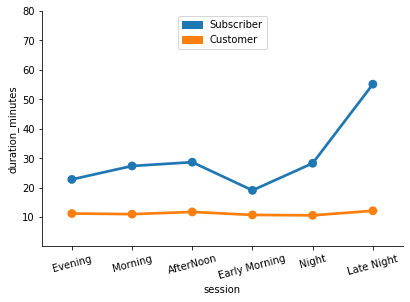

In [281]:
import matplotlib
g=sb.FacetGrid(data=df,hue='user_type',hue_order=['Customer','Subscriber'],height=4,aspect=1.5)
g=g.map(sb.pointplot,'session','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Evening','Morning','AfterNoon','Early Morning','Night','Late Night'])
name_to_color = {
    'Subscriber':   sb.color_palette()[0],
    'Customer': sb.color_palette()[1],
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches)

plt.ylim(0.1,80)
plt.xticks(rotation=15)

#### Findings
> through tha same day Subscriber people on Average spend more time on trips than Customers.

> The most session the Subscribers spend time in through the same day is the Late Night session.

> The most session the Customers spend time in through the same day is the Late Night session.

### 3- session Vs. duration_minutes Vs. dayofweek

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

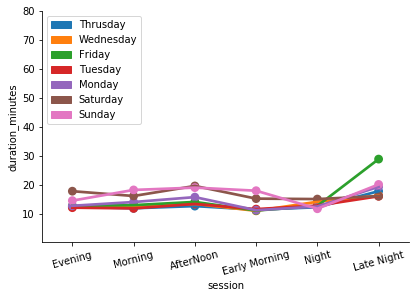

In [270]:


g=sb.FacetGrid(data=df,hue='dayofweek',
               hue_order=['Thrusday','Wednesday','Friday','Tuesday','Monday','Saturday','Sunday'],
               height=4,aspect=1.5)
g=g.map(sb.pointplot,'session','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Evening','Morning','AfterNoon','Early Morning','Night','Late Night'])

name_to_color = {
    'Thrusday':   sb.color_palette()[0],
    'Wednesday': sb.color_palette()[1],
    'Friday':   sb.color_palette()[2],
    'Tuesday': sb.color_palette()[3],
    'Monday':   sb.color_palette()[4],
    'Saturday': sb.color_palette()[5],
    'Sunday':   sb.color_palette()[6]
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches)

plt.ylim(0.1,80)
plt.xticks(rotation=15)

> the visualization isn't good enough to notice every day alone.

> so let's make each day in a separated chart.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

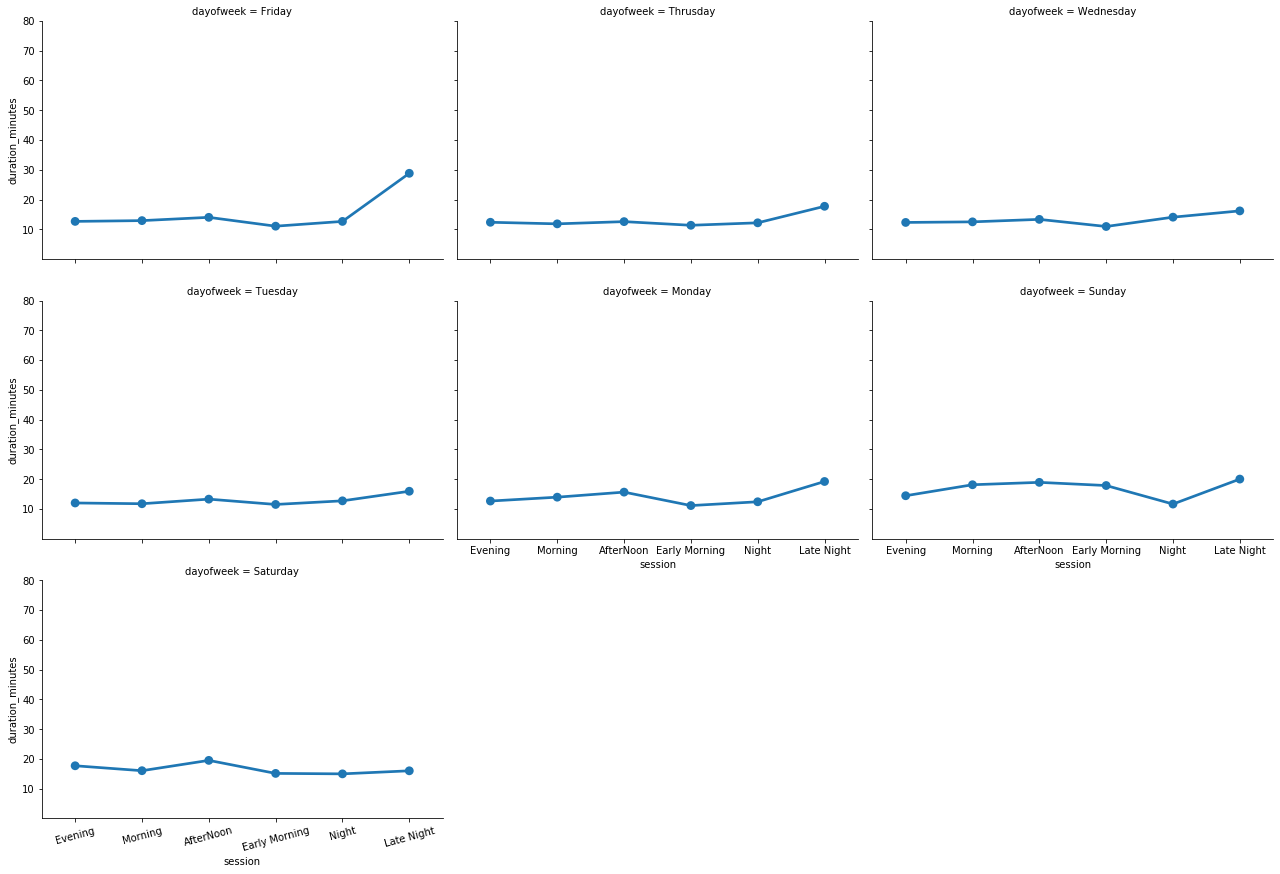

In [267]:

g=sb.FacetGrid(data=df,col='dayofweek',palette='viridis_r',height=4,aspect=1.5,col_wrap=3)
g=g.map(sb.pointplot,'session','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Evening','Morning','AfterNoon','Early Morning','Night','Late Night'])


plt.ylim(0.1,80)
plt.xticks(rotation=15)

#### Findings
> Friday at Late Night is the time the people spend the most time on trips in.

> Tuesday and Thrusday is the days which people spend the least amount of time through the sessions of these days on trips.

> Sunday at Night , Monday at Early morning, tuesday at Morning and thrusday at Morning is the time when people spend the leat time on trips .

### 4- dayofweek Vs. duration_minutes Vs. session

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

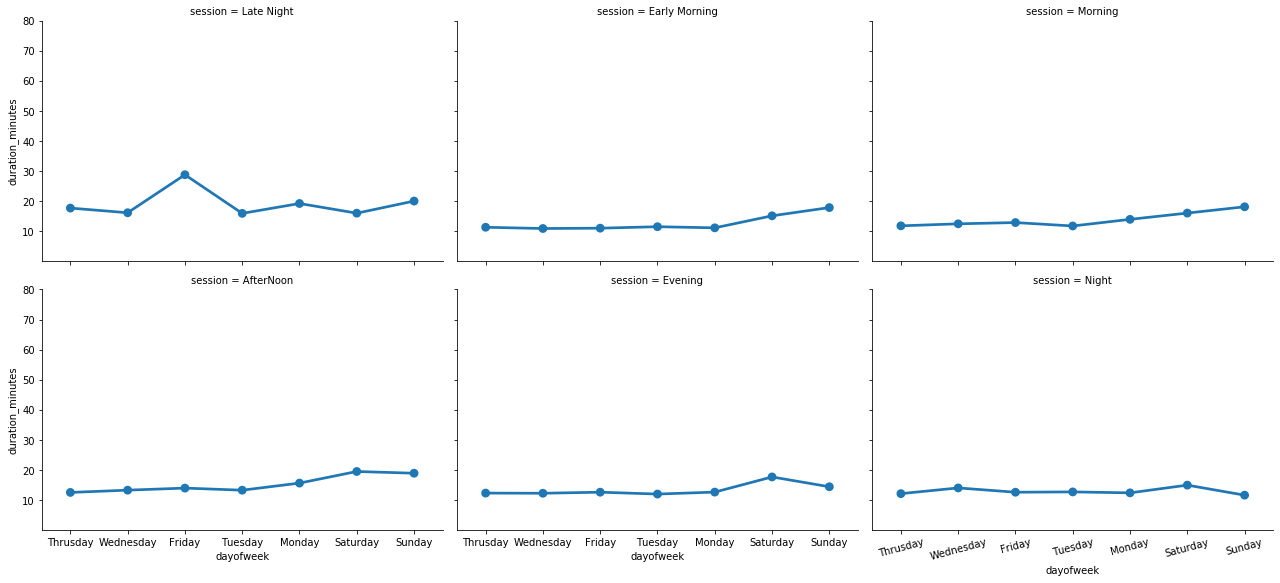

In [268]:


g=sb.FacetGrid(data=df,col='session',palette='viridis_r',height=4,aspect=1.5,col_wrap=3)
g=g.map(sb.pointplot,'dayofweek','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Thrusday','Wednesday','Friday','Tuesday','Monday','Saturday','Sunday'])


plt.ylim(0.1,80)
plt.xticks(rotation=15)

### 5- user_type Vs. duration_minutes Vs. dayofweek

(array([0, 1]), <a list of 2 Text xticklabel objects>)

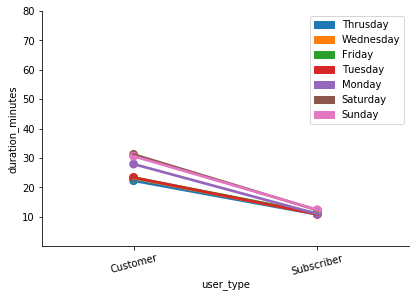

In [282]:


g=sb.FacetGrid(data=df,hue='dayofweek',
               hue_order=['Thrusday','Wednesday','Friday','Tuesday','Monday','Saturday','Sunday'],
               height=4,aspect=1.5)
g=g.map(sb.pointplot,'user_type','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Customer','Subscriber'])

name_to_color = {
    'Thrusday':   sb.color_palette()[0],
    'Wednesday': sb.color_palette()[1],
    'Friday':   sb.color_palette()[2],
    'Tuesday': sb.color_palette()[3],
    'Monday':   sb.color_palette()[4],
    'Saturday': sb.color_palette()[5],
    'Sunday':   sb.color_palette()[6]
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches)

plt.ylim(0.1,80)
plt.xticks(rotation=15)

### 6- user_type Vs. duration_minutes Vs. session

(array([0, 1]), <a list of 2 Text xticklabel objects>)

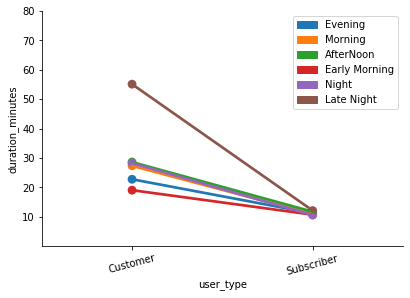

In [283]:


g=sb.FacetGrid(data=df,hue='session',
               hue_order=['Evening','Morning','AfterNoon','Early Morning','Night','Late Night'],
               height=4,aspect=1.5)
g=g.map(sb.pointplot,'user_type','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Customer','Subscriber'])

name_to_color = {
    'Evening':   sb.color_palette()[0],
    'Morning': sb.color_palette()[1],
    'AfterNoon':   sb.color_palette()[2],
    'Early Morning': sb.color_palette()[3],
    'Night':   sb.color_palette()[4],
    'Late Night': sb.color_palette()[5]
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches)

plt.ylim(0.1,80)
plt.xticks(rotation=15)

### 7- session Vs. duration_minutes Vs. dayofweek Vs. user_type

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

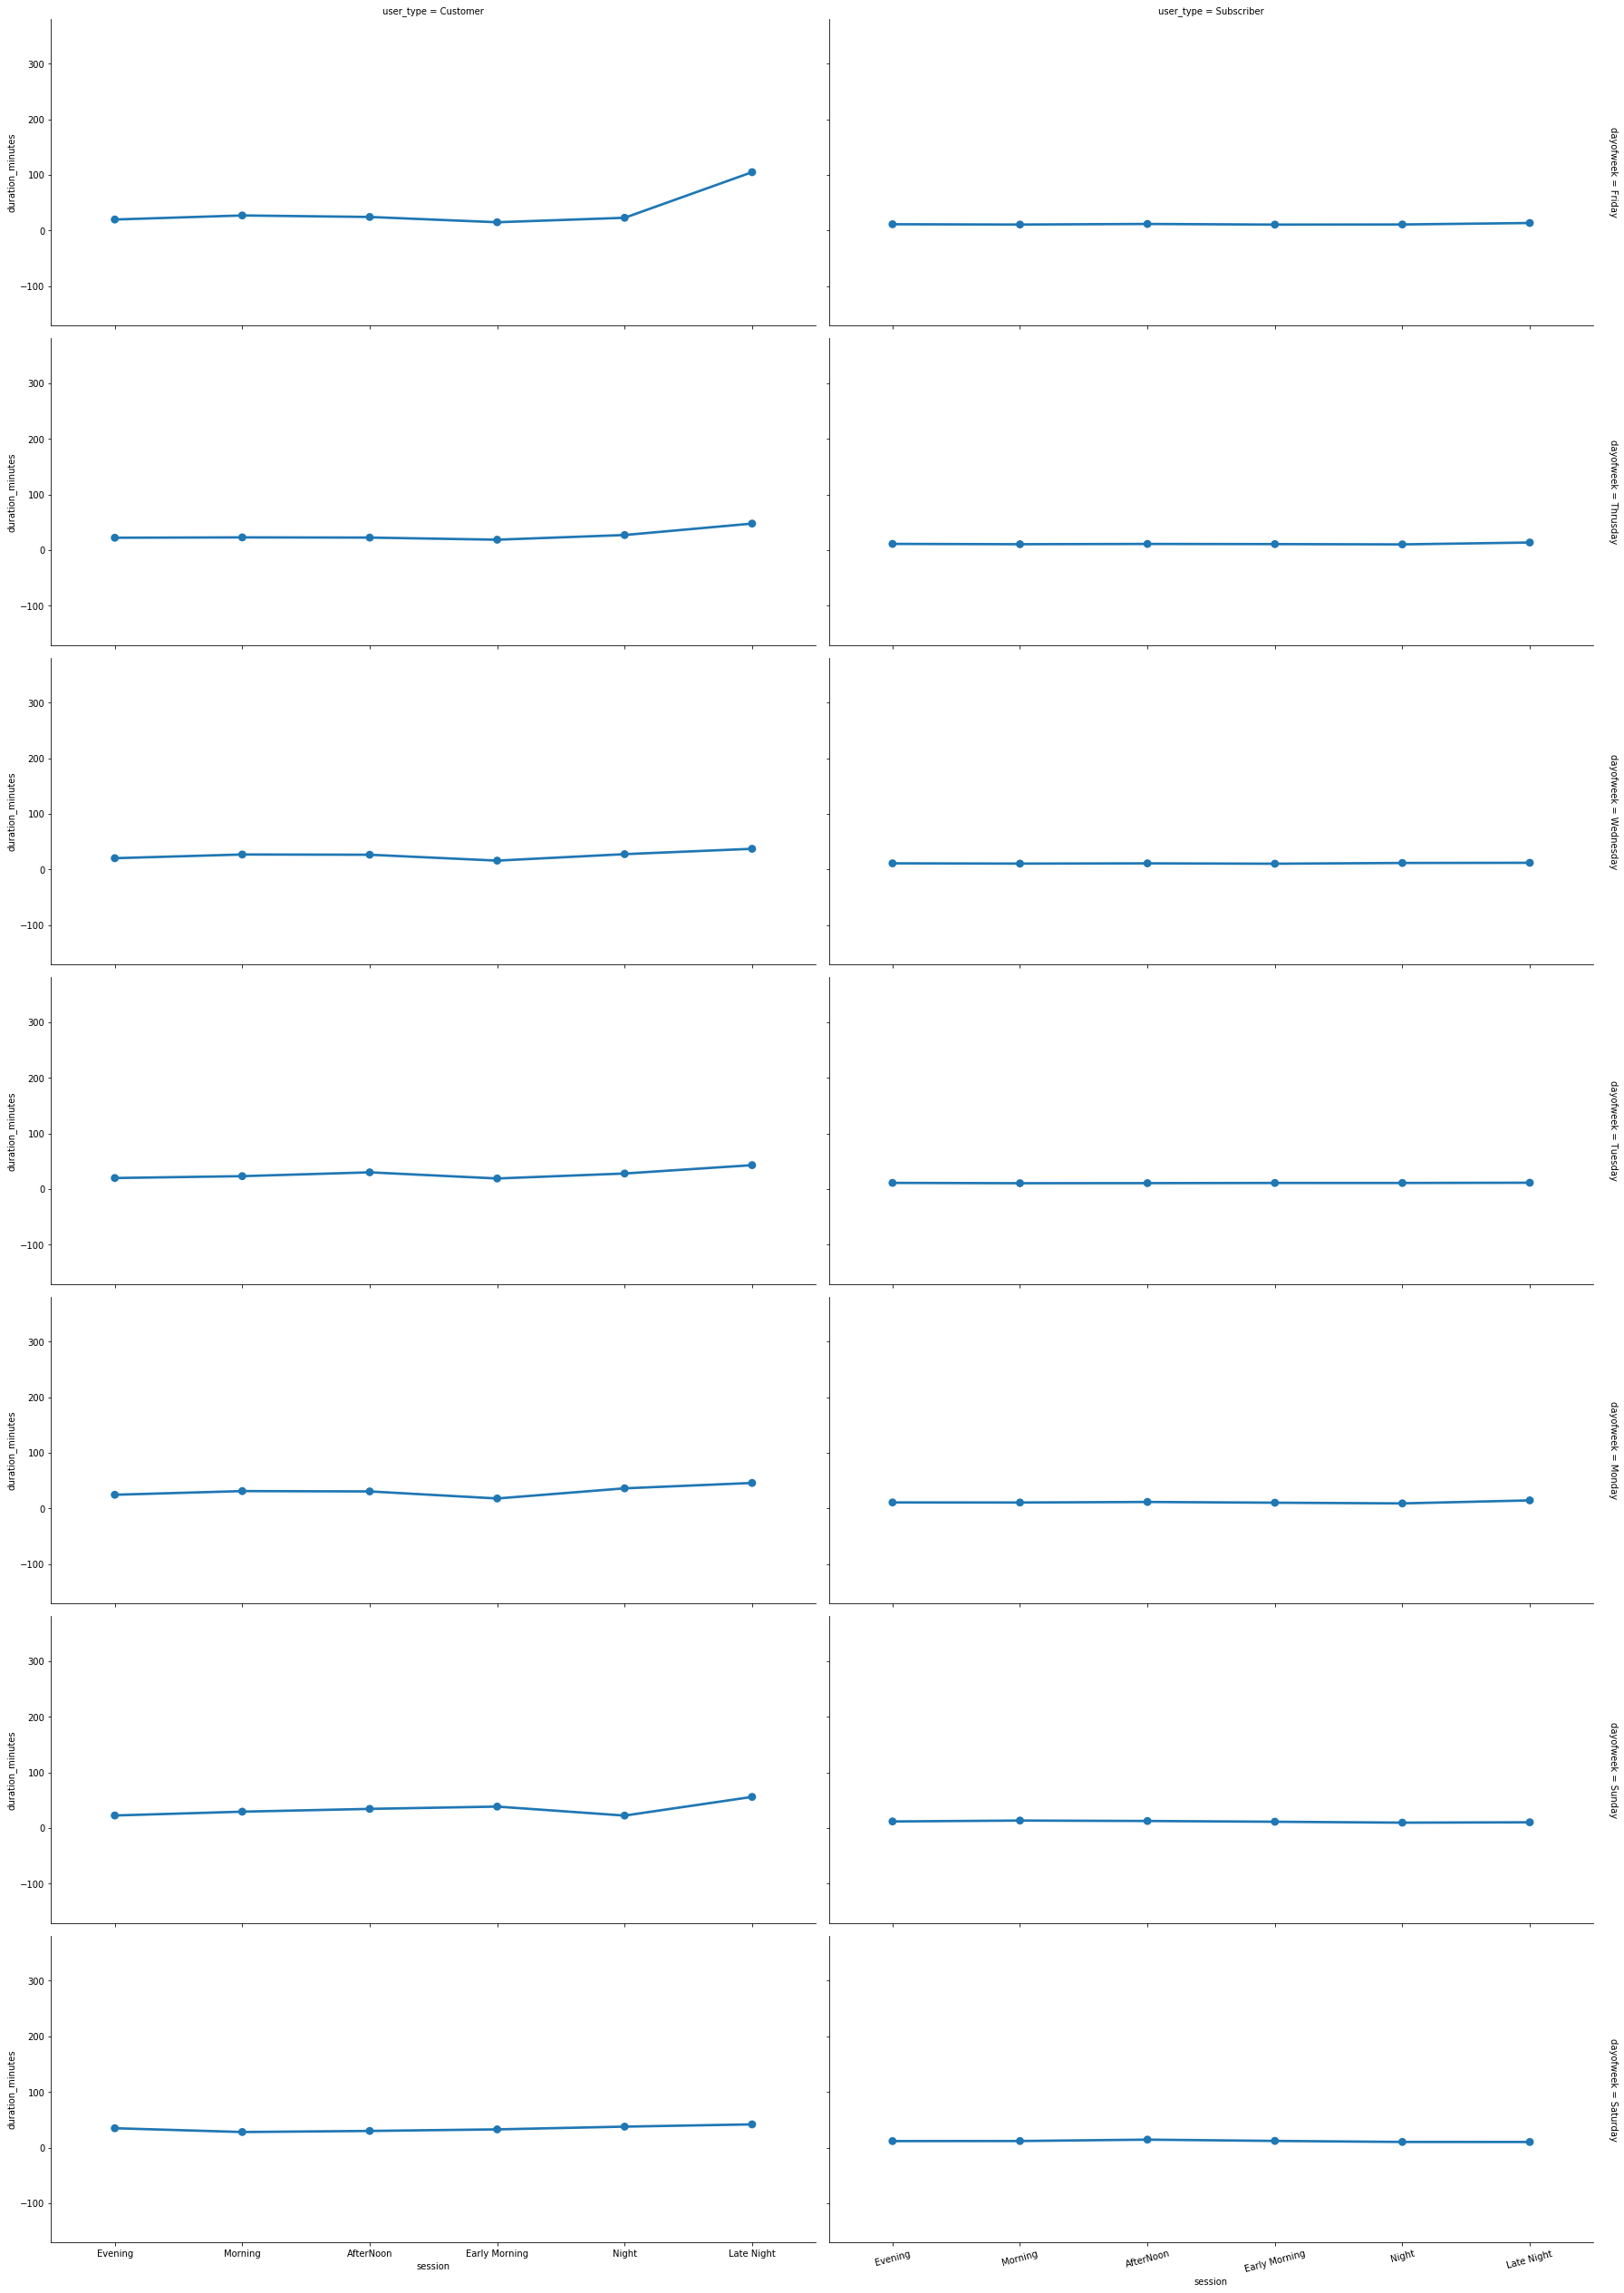

In [279]:


g=sb.FacetGrid(data=df,row='dayofweek',col='user_type',palette='viridis_r',height=5,aspect=2.5,margin_titles=True)
g=g.map(sb.pointplot,'session','duration_minutes',x_jitter=0.04,errwidth=0,ci='sd',
        order=['Evening','Morning','AfterNoon','Early Morning','Night','Late Night'])



plt.xticks(rotation=15)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>about the relationships:

> 1- daysofweek Vs. duration_minutes Vs. user_type: 
>>- from the chart we can say that on average Subscriber users spend more time in trips than Customer users.
>>- Subscriber users spend more time in trips on Saturday Than any day .
>>- Customer users spend more time in trips on Saturday and Sunday Than any day .

> 2-session Vs. duration_minutes Vs. user_type:
>>- through the same day Subscriber people on Average spend more time on trips than Customers.
>>- The most session the Subscribers spend time in through the same day is the Late Night session.
>>- The most session the Customers spend time in through the same day is the Late Night session

> 3- session Vs. duration_minutes Vs. dayofweek:
>>- Friday at Late Night is the time the people spend the most time on trips in.
>>- Tuesday and Thrusday is the days which people spend the least amount of time through the sessions of these days on trips.
>>- Sunday at Night , Monday at Early morning, tuesday at Morning and thrusday at Morning is the time when people spend the leat time on trips .

> we can notice that ..yes there are some features strengthened each other 
like in the relation of ( daysofweek Vs. duration_minutes Vs. user_type) , (session Vs. duration_minutes Vs. user_type)
and (session Vs. duration_minutes Vs. dayofweek)
the third feature in each of these relationships emphasize and make the relation clearer and produce more details to underatand 
these relation ships.
### Were there any interesting or surprising interactions between features?

> yes .. (session Vs. duration_minutes Vs. dayofweek Vs. user_type)